![Train Wreck](https://github.com/PaulWAyers/IntroQChem/blob/main/linkedFiles/TrainWreck.jpg?raw=true "Train wreck at Montparnasse Station; from 1895 and in the public domain")

# Approximate Methods for Solving One-Particle Schr&ouml;dinger Equations
Up to this point, we've focused on systems for which we can solve the Schr&ouml;dinger equation. Unfortunately, there are very few such systems, and their relevance for real chemical systems is very limited. This motivates the approximate methods for solving the Schr&ouml;dinger equation. One must be careful, however, if one makes poor assumptions, the results of approximate methods can be very poor. Conversely, with appropriate insight, approximation techniques can be extremely useful. 

## Expansion in a Basis
We have seen the eigenvectors of a Hermitian operator are a complete basis, and can be chosen to be orthonormal. We have also seen how a wavefunction can be expanded in a basis,

$$
\Psi(x) = \sum_{k=0}^{\infty} c_k \phi_k(x)
$$

Note that there is no requirement that the basis set, $\{\phi_k(x) \}$ be eigenvectors of a Hermitian operator: all that matters is that the basis set is complete. For real problems, of course, one can choose only a finite number of basis functions, 

$$
\Psi(x) \approx \sum_{k=0}^{N_{\text{basis}}} c_k \phi_k(x)
$$

but as the number of basis functions, $N_{\text{basis}}$, increases, results should become increasingly accurate. 

Substituting this expression for the wavefunction into the time-independent Schr&ouml;dinger equation,

$$
\hat{H} \Psi(x) = \hat{H} \sum_{k=0}^{\infty} c_k \phi_k(x) = E \sum_{k=0}^{\infty} c_k \phi_k(x)
$$

Multiplying on the left by $\left(\phi_j(x) \right)^*$ and integrating over all space,  

$$
 \sum_{k=0}^{\infty} \left[\int \left(\phi_j(x) \right)^* \hat{H} \phi_k(x) dx \right] c_k 
 = E \sum_{k=0}^{\infty}\left[ \int \left(\phi_j(x) \right)^* \phi_k(x) dx\right] c_k
$$

At this stage we usually define the Hamiltonian matrix, $\mathbf{H}$, as the matrix with elements

$$
h_{jk} = \int \left(\phi_j(x) \right)^* \hat{H} \phi_k(x) dx 
$$

and the overlap matrix, $\mathbf{S}$ as the matrix with elements

$$
s_{jk} = \int \left(\phi_j(x) \right)^* \phi_k(x) dx
$$

If the basis is orthonormal, then the overlap matrix is equal to the identity matrix, $\mathbf{S} = \mathbf{I}$ and its elements are therefore given by the Kronecker delta, $s_{jk} = \delta_{jk}$.

The Schr&ouml;dinger equation therefore can be written as a [generalized matrix eigenvalue problem](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Generalized_eigenvalue_problem):

$$
\mathbf{Hc}=E\mathbf{Sc}
$$

or, in element-wise notation, as:

$$
 \sum_{k=0}^{\infty} h_{jk} c_k 
 = E \sum_{k=0}^{\infty} s_{jk} c_k
$$

In the special case where the basis functions are orthogonormal, $\mathbf{S} = \mathbf{I}$ and this is an ordinary [matrix eigenvalue problem](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Eigenvalues_and_eigenvectors_of_matrices),

$$
\mathbf{Hc}=E\mathbf{c}
$$

or, in element-wise notation, as:

$$
 \sum_{k=0}^{\infty} h_{jk} c_k 
 = E c_j
$$

### Solving the Secular Equation
In the context of quantum chemistry, the generalized eigenvalue problem 

$$
\mathbf{Hc}=E\mathbf{Sc}
$$

is called the *secular equation*. To solve the secular equation:
1. Choose a basis, $\{|\phi_k\rangle \}$ and a basis-set size, $N_{\text{basis}}$
1. Evaluate the matrix elements of the Hamiltonian and the overlap matrix

$$
\begin{align}
h_{jk} &= \int \left(\phi_j(x) \right)^* \hat{H} \phi_k(x) dx  \qquad \qquad 0 \le j,k \le N_{\text{basis}} \\
s_{jk} &= \int \left(\phi_j(x) \right)^* \phi_k(x) dx 
\end{align}
$$

3. Solve the generalized eigenvalue problem

$$
 \sum_{k=0}^{\infty} h_{jk} c_k 
 = E \sum_{k=0}^{\infty} s_{jk} c_k
$$

Because of the variational principle, the lowest eigenvalue will always be greater than or equal to the true ground-state energy. 

### Example for the Particle-in-a-Box
As an example, consider an electron confined to a box with length 2 Bohr, stretching from $x=-1$ to $x=1$. We know that the exact energy of this system is 

$$
E=\tfrac{(\pi n)^2}{8}
$$ 

The exact wavefunctions are easily seen to be 

$$
\psi_n(x) = 
\begin{cases}
\cos\left(\tfrac{n \pi x}{2}\right) & n=1,3,5,\ldots \\
\sin\left(\tfrac{n \pi x}{2}\right) & n=2,4,6,\ldots 
\end{cases}
$$ 

However, for pedagogical purposes, suppose we did not know these answers. We know that the wavefunction will be zero at $x= \pm1$, so we might hypothesize a basis like:

$$
\phi_k(x) = (x-1)(x+1)x^k = x^{k+2} - x^{k} \qquad \qquad k=0,1,2,\ldots
$$

The overlap matrix elements are

$$
\begin{align}
s_{jk} &= \int_{-1}^{1} \left(\phi_j(x) \right)^* \phi_k(x) dx \\
&= \int_{-1}^{1} \left(x^{j+2}-x^{j}\right) \left(x^{k+2} - x^{k}\right) dx \\
&= \int_{-1}^{1} \left(x^{j+k+4}+x^{j+k} - 2 x^{j+k+2}\right) dx \\
&= \left[\frac{x^{k+j+5}}{k+j+5} + \frac{x^{k+j+1}}{k+j+1} 
- 2\frac{x^{k+j+3}}{k+j+3} \right]_{-1}^{+1}
\end{align}
$$

This integral is zero when $k+j$ is odd. Specifically,

$$
s_{jk} = 
\begin{cases}
    0 & j+k \text{ is odd}\\
    2\left(\frac{1}{k+j+5} - \frac{2}{k+j+3} + \frac{1}{k+j+1}  \right)       & j+k \text{ is even}
\end{cases}
$$

and the Hamiltonian matrix elements are

$$
\begin{align}
h_{jk} &= \int_{-1}^{1} \left(\phi_j(x) \right)^* \hat{H} \phi_k(x) dx \\
&= \int_{-1}^{1} \left(x^{j+2}-x^{j}\right) \left(-\tfrac{1}{2}\tfrac{d^2}{dx^2}\right) \left(x^{k+2} - x^{k}\right) dx \\
&= -\tfrac{1}{2}\int_{-1}^{1} \left(x^{j+2}-x^{j}\right) \left((k+2)(k+1)x^{k} - (k)(k-1)x^{k-2}\right) dx \\
&= -\tfrac{1}{2}\int_{-1}^{1} \left((k+2)(k+1)x^{k+j+2} + (k)(k-1)x^{k+j-2} -\left[(k+2)(k+1) + k(k-1) \right]x^{k+j} \right) dx \\
&= -\tfrac{1}{2}\left[\left(\frac{(k+2)(k+1)}{k+j+3}x^{k+j+3} + \frac{(k)(k-1)}{k+j-1}x^{k+j-1} 
- \frac{(k+2)(k+1) + k(k-1)}{k+j+1}x^{k+j+1} \right) \right]_{-1}^{+1}
\end{align}
$$

This integral is also zero when $k+j$ is odd. Specifically,

$$
h_{jk} = 
\begin{cases}
    0 & j+k \text{ is odd}\\
    2\left(\frac{(k+2)(k+1)}{k+j+3} - \frac{(k+2)(k+1) + k(k-1)}{k+j+1} + \frac{(k)(k-1)}{k+j-1}  \right)       & j+k \text{ is even}
\end{cases}
$$


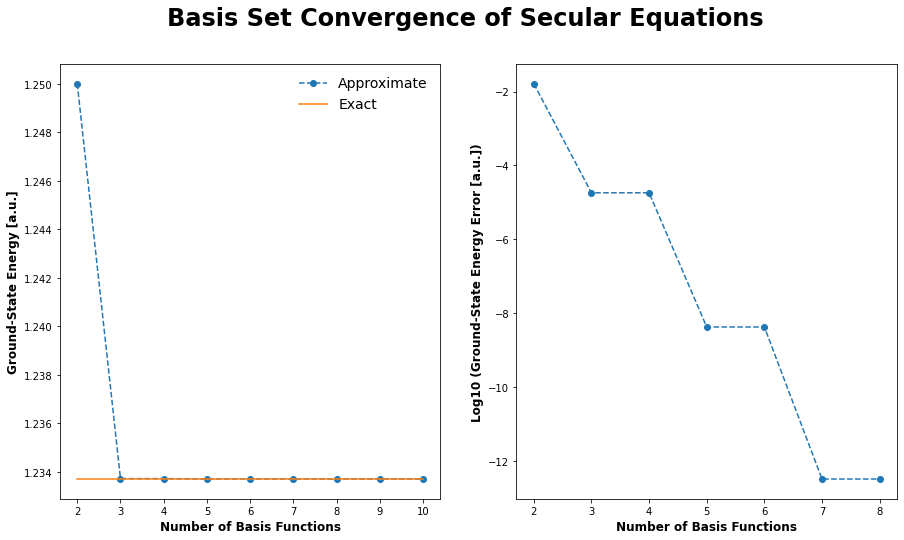

In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt


def compute_energy_ground_state(n_basis):
    """Compute ground state energy by solving the Secular equations."""
    # assign S & H to zero matrices
    s = np.zeros((n_basis, n_basis))
    h = np.zeros((n_basis, n_basis))

    # loop over upper-triangular elements & compute S & H elements
    for j in range(0, n_basis):
        for k in range(j, n_basis):
            if (j + k) % 2 == 0:
                s[j, k] = s[k, j] = 2 * (1 / (k + j + 5) - 2 / (k + j + 3) + 1 / (k + j + 1))
                h[j, k] = h[k, j] = -1 * (((k + 2) * (k + 1)) / (k + j + 3) -  ((k + 2) * (k + 1) + k * (k - 1)) / (k + j + 1) + (k**2 - k) / (k + j - 1))
    
    # solve Hc = ESc to get eigenvalues E
    e_vals = eigh(h, s, eigvals_only=True)
    return e_vals[0]


# plot basis set convergence of Secular equations
# -----------------------------------------------

# evaluate energy for a range of basis functions
n_values = np.arange(2, 11, 1)
e_values = np.array([compute_energy_ground_state(n) for n in n_values])
expected_energy = (1 * np.pi)**2 / 8.

plt.rcParams['figure.figsize'] = [15, 8]
fig, axes = plt.subplots(1, 2)
fig.suptitle("Basis Set Convergence of Secular Equations", fontsize=24, fontweight='bold')

for index, axis in enumerate(axes.ravel()):
    if index == 0:
        # plot approximate & exact energy
        axis.plot(n_values, e_values, marker='o', linestyle='--', label='Approximate')
        axis.plot(n_values, np.repeat(expected_energy, len(n_values)), marker='', linestyle='-', label='Exact')
        # set axes labels
        axis.set_xlabel("Number of Basis Functions", fontsize=12, fontweight='bold')
        axis.set_ylabel("Ground-State Energy [a.u.]", fontsize=12, fontweight='bold')
        axis.legend(frameon=False, fontsize=14)
    else:
        # plot log of approximate energy error (skip the last two values because they are zero)
        axis.plot(n_values[:-2], np.log10(e_values[:-2] - expected_energy), marker='o', linestyle='--')
        # set axes labels
        axis.set_xlabel("Number of Basis Functions", fontsize=12, fontweight='bold')
        axis.set_ylabel("Log10 (Ground-State Energy Error [a.u.])", fontsize=12, fontweight='bold')

plt.show()

### Particle-in-a-Box with Jacobi polynomials
Similar results can be obtained with different basis functions. It is often convenient to use an orthonormal basis, where $s_{jk} = \delta_{jk}$. For the particle-in-a-box with $-1 \le x \le 1$, one such set of basis functions can be constructed from the (normalized) [Jacobi polynomials](https://en.wikipedia.org/wiki/Jacobi_polynomials),

$$
\phi_j(x) = N_j(1-x)(1+x)P_j^{(2,2)}(x)
$$

where $N_j$ is the normalization constant

$$
N_j = \sqrt{\frac{(2j+5)(j+4)(j+3)}{32(j+2)(j+1)}}
$$

To evaluate the Hamiltonian it is useful to know that:

$$
\begin{align}
\frac{d^2\phi_j(x)}{dx^2} &= N_j
\left(-2 P_j^{(2,2)}(x) - 4x \frac{d P_j^{(2,2)}(x)}{dx} + (1-x)(1+x)\frac{d^2 P_j^{(2,2)}(x)}{dx^2} \right) \\
&= N_j
\left(-2 P_j^{(2,2)}(x) - 4x \frac{j+5}{2} P_{j-1}^{(3,3)}(x) + (1-x^2)\frac{(j+5)(j+6)}{4}P_{j-2}^{(4,4)}(x) \right) 
\end{align}
$$

The Hamiltonian matrix elements could be evaluated analytically, but the expression is pretty complicated. It's easier to merely evaluate them numerically as:

$$
h_{jk} = -\frac{1}{2}N_j N_k \int_{-1}^1 (1-x)(1+x) P_k^{(2, 2)}(x) \left(-2 P_j^{(2,2)}(x) - 4x \frac{j+5}{2} P_{j-1}^{(3,3)}(x) + (1-x^2)\frac{(j+5)(j+6)}{4}P_{j-2}^{(4,4)}(x) \right) dx 
$$



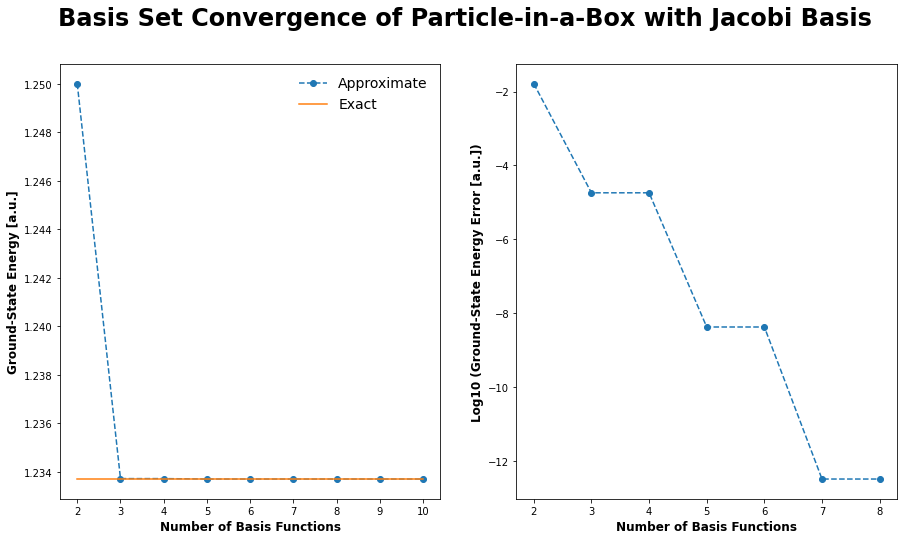

In [2]:
import numpy as np
from scipy.linalg import eigh
from scipy.special import eval_jacobi
from scipy.integrate import quad
import matplotlib.pyplot as plt


def compute_energy_ground_state(n_basis):
    """Compute ground state energy for a particle-in-a-Box with Jacobi basis."""
    
    def normalization(i):
        return np.sqrt((2 * i + 5) * (i + 4) * (i + 3) / (32 * (i + 2) * (i + 1)))
    
    def phi_squared(x, j):
        return (normalization(j) * (1 - x) * (1 + x) * eval_jacobi(j, 2, 2, x))**2
    
    def integrand(x, j, k):
        term = -2 * eval_jacobi(j, 2, 2, x)
        if j - 1 >= 0:
            term -= 2 * x * (j + 5) * eval_jacobi(j - 1, 3, 3, x)
        if j - 2 >= 0:
            term += 0.25 * (1 - x**2) * (j + 5) * (j + 6) * eval_jacobi(j - 2, 4, 4, x)
        return (1 - x) * (1 + x) * eval_jacobi(k, 2, 2, x) * term
    
    # assign H to a zero matrix
    h = np.zeros((n_basis, n_basis))

    # compute H elements
    for j in range(n_basis):
        for k in range(n_basis):
            integral = quad(integrand, -1.0, 1.0, args=(j, k))[0]
            h[j, k] = -0.5 * normalization(j) * normalization(k) * integral

    # solve Hc = Ec to get eigenvalues E
    e_vals = eigh(h, None, eigvals_only=True)
    return e_vals[0]


# plot basis set convergence of particle-in-a-Box with Jacobi basis
# -----------------------------------------------------------------

# evaluate energy for a range of basis functions
n_values = np.arange(2, 11, 1)
e_values = np.array([compute_energy_ground_state(n) for n in n_values])
expected_energy = (1 * np.pi)**2 / 8.

plt.rcParams['figure.figsize'] = [15, 8]
fig, axes = plt.subplots(1, 2)
fig.suptitle("Basis Set Convergence of Particle-in-a-Box with Jacobi Basis", fontsize=24, fontweight='bold')

for index, axis in enumerate(axes.ravel()):
    if index == 0:
        # plot approximate & exact energy
        axis.plot(n_values, e_values, marker='o', linestyle='--', label='Approximate')
        axis.plot(n_values, np.repeat(expected_energy, len(n_values)), marker='', linestyle='-', label='Exact')
        # set axes labels
        axis.set_xlabel("Number of Basis Functions", fontsize=12, fontweight='bold')
        axis.set_ylabel("Ground-State Energy [a.u.]", fontsize=12, fontweight='bold')
        axis.legend(frameon=False, fontsize=14)
    else:
        # plot log of approximate energy error (skip the last two values because they are zero)
        axis.plot(n_values[:-2], np.log10(e_values[:-2] - expected_energy), marker='o', linestyle='--')
        # set axes labels
        axis.set_xlabel("Number of Basis Functions", fontsize=12, fontweight='bold')
        axis.set_ylabel("Log10 (Ground-State Energy Error [a.u.])", fontsize=12, fontweight='bold')

plt.show()

#### &#x1f914; Thought-Provoking Question: Why does adding odd-order polynomials to the basis set not increase the accuracy for the ground state wavefunction. 
Hint: The ground state wavefunction is an even function.
A function is said to be even if it is symmetric about the origin, $f(x) = f(-x)$. A function is said to be odd if it is antisymmetric around the origin, $f(x) = - f(-x)$. Even-degree polynomials (e.g., $1, x^2, x^4, \ldots$) are even functions; odd-degree polynomials (e.g.; $x, x^3, x^5, \ldots$) are odd functions. $\cos(ax)$ is an even function and $\sin(ax)$ is an odd function. $\cosh(ax)$ is an even function and $\sinh(ax)$ is an odd function. In addition,
- A linear combination of odd functions is also odd.
- A linear combination of even functions is also even.
- The product of two odd functions is even.
- The product of two even functions is even.
- The product of an odd and an even function is odd.
- The integral of an odd function from $-a$ to $a$ is always zero.
- The integral of an even function from $-a$ to $a$ is always twice the value of its integral from $0$ to $a$; it is also twice its integral from $-a$ to $0$.
- The first derivative of an even function is odd.
- The first derivative of an odd function is even.
- The k-th derivative of an even function is odd if k is odd, and even if k is even.
- The k-th derivative of an odd function is even if k is odd, and odd if k is even.

These properties of odd and even functions are often very useful. In particular, the first and second properties indicate that if you know that the exact wavefunction you are looking for is odd (or even), it will be a linear combination of basis functions that are odd (or even). E.g., odd basis functions are useless for approximating even eigenfunctions.

#### &#x1f914; Thought-Provoking Question: Why does one get exactly the same results for the Jacobi polynomials and the simpler $(1-x)(1+x)x^k$ polynomials? 
Hint: Can you rewrite one set of polynomials as a linear combination of the others?

![Balancing Rock](https://github.com/PaulWAyers/IntroQChem/blob/main/linkedFiles/Perturbation.jpg?raw=true "A precariously balanced rock. CC BY-NC-SA 2.0 license by Tatiana Gerus")

## Perturbation Theory
It is not uncommon that a Hamiltonian for which the Schr&ouml;dinger equation is difficult to solve is "close" to another Hamiltonian that is easier to solve. In such cases, one can attempt to solve the easier problem, then *perturb* the system towards the actual, more difficult to solve, system of interest. The idea of leveraging easy problems to solve difficult problems is the essence of [perturbation theory](https://en.wikipedia.org/wiki/Perturbation_theory).


### The Perturbed Hamiltonian
Suppose that for some Hamiltonian, $\hat{H}$, we know the eigenfunctions and eigenvalues,

$$
\hat{H} |\psi_k \rangle = E_k |\psi_k \rangle
$$

However, we are not interested in this Hamiltonian, but a different Hamiltonian, $\tilde{H}$, which we can write as:

$$
\tilde{H} = \hat{H} + \hat{V}
$$

where obviously

$$
\hat{V} = \tilde{H} - \hat{H}
$$

Let us now define a family of perturbed Hamiltonians, 

$$
\hat{H}(\lambda) = \hat{H} + \lambda \hat{V}
$$

where obviously:

$$
\hat{H}(\lambda) = 
\begin{cases}
    \hat{H} & \lambda = 0\\
    \tilde{H} & \lambda = 1
\end{cases}
$$

Writing the Schr&ouml;dinger equation for $\hat{H}_\lambda$, we have:

$$
\hat{H}(\lambda) |\psi_k(\lambda) \rangle = E_k(\lambda) |\psi_k(\lambda) \rangle 
$$

This equation holds true for all values of $\lambda$. Since we know the answer for $\lambda = 0$, and we *assume* that the perturbed system described by $\tilde{H}$ is close enough to $\hat{H}$ for the solution at $\lambda =0$ to be useful, we will write the expand the energy and wavefunction as [Taylor-MacLaurin series](https://en.wikipedia.org/wiki/Taylor_series)

$$
\begin{align}
E_k(\lambda) &= E_k(\lambda=0) + \lambda \left[\frac{dE_k}{d \lambda} \right]_{\lambda=0} 
+ \frac{\lambda^2}{2!} \left[\frac{d^2E_k}{d \lambda^2} \right]_{\lambda=0} 
+ \frac{\lambda^3}{3!} \left[\frac{d^3E_k}{d \lambda^3} \right]_{\lambda=0} + \cdots \\
|\psi_k(\lambda) \rangle &= |\psi_k(\lambda=0) \rangle + \lambda \left[\frac{d|\psi_k \rangle}{d \lambda} \right]_{\lambda=0} 
+ \frac{\lambda^2}{2!} \left[\frac{d^2|\psi_k \rangle}{d \lambda^2} \right]_{\lambda=0} 
+ \frac{\lambda^3}{3!} \left[\frac{d^3|\psi_k \rangle}{d \lambda^3} \right]_{\lambda=0} + \cdots 
\end{align}
$$

When we write this, we are implicitly assuming that the derivatives all exist, which is not true if the zeroth-order state is degenerate (unless the perturbation does not break the degeneracy).

If we insert these expressions into the Schr&ouml;dinger equation for $\hat{H}(\lambda)$, we obtain a polynomial of the form:

$$
0=p(\lambda)= a_0 + a_1 \lambda + a_2 \lambda^2 + a_3 \lambda^3 + \cdots
$$

This equation can only be satisfied for *all* $\lambda$ if all its terms are zero, so 

$$
0 = a_0 = a_1 = a_2 = \cdots
$$ 

The key equations that need to be solved are listed below. First there is the zeroth-order equation, which is automatically satisfied:

$$
0 = a_0 = \left( \hat{H}(0) - E_k(0) \right) | \psi_k(0) \rangle 
$$

The first-order equation is:

$$
0 = a_1 = \left( \hat{H}(0) - E_k(0) \right) \left[\frac{d|\psi_k \rangle}{d \lambda} \right]_{\lambda=0} +\left(\hat{V} -  \left[\frac{dE_k}{d \lambda} \right]_{\lambda=0}\right)|\psi_k(\lambda=0) \rangle 
$$

The second-order equation is:

$$
0 = a_2 = \tfrac{1}{2} \left( \hat{H}(0) - E_k(0) \right) \left[\frac{d^2|\psi_k \rangle}{d \lambda^2} \right]_{\lambda=0} +\left(\hat{V} -  \left[\frac{dE_k}{d \lambda} \right]_{\lambda=0}\right)\left[\frac{d|\psi_k \rangle}{d \lambda} \right]_{\lambda=0}
-\tfrac{1}{2} \left[\frac{d^2E_k}{d \lambda^2} \right]_{\lambda=0} |\psi_k(\lambda=0) \rangle 
$$

Higher-order equations are increasingly complicated, but still tractable in some cases. One usually applies perturbation theory only when the perturbation is relatively small, which usually suffices to ensure that the Taylor series expansion converges rapidly and higher-order terms are relatively insignificant.

### Hellmann-Feynman Theorem
The [Hellmann-Feynman theorem](https://en.wikipedia.org/wiki/Hellmann%E2%80%93Feynman_theorem) has been discovered many times, most impressively by [Richard Feynman](https://en.wikipedia.org/wiki/Richard_Feynman), who included it in his undergraduate senior thesis. In simple terms:
> **Hellmann-Feynman Theorem**: Suppose that the Hamiltonian, $\hat{H}(\lambda)$ depends on a parameter. Then the first-order change in the energy with respect to the parameter is given by the equation,

$$
\left[\frac{dE}{d\lambda}\right]_{\lambda = \lambda_0} = \int \left( \psi(\lambda_0;x)\right)^* \left[\frac{d\hat{H}}{d \lambda} \right]_{\lambda = \lambda_0}\psi(\lambda_0;x) \; dx
$$


#### Derivation of the Hellmann-Feynman Theorem by Differentiation Under the Integral Sign
The usual way to derive the Hellmann-Feynman theorem uses the technique of [differentiation under the integral sign](https://en.wikipedia.org/wiki/Leibniz_integral_rule). Therefore, 

$$
\frac{dE}{d\lambda} = \frac{d}{d\lambda}\int \left( \psi(\lambda;x)\right)^* \hat{H}\psi(\lambda;x) \; dx = \int \frac{d\left( \psi(\lambda;x)\right)^* \hat{H}\psi(\lambda;x) }{d\lambda}\; dx
$$

While such an operation is not always mathematically permissible, it is usually permissible, as should be clear from the definition of the derivative as a limit of a difference,

$$
\left[\frac{dE}{d\lambda}\right]_{\lambda = \lambda_0} = \lim_{h\rightarrow0} \frac{E(\lambda_0 + h) - E(\lambda_0)}{h}
$$

and the fact that the integral of a sum is the sum of the integrals. Using the product rule for derivatives, one obtains:

$$
\begin{align}
\frac{dE}{d\lambda} &= \int \frac{d\left( \psi(\lambda;x)\right)^* \hat{H}\psi(\lambda;x) }{d\lambda}\; dx \\
&=\int 
  \frac{\left(\psi(\lambda;x)\right)^*}{d\lambda} \hat{H} \psi(\lambda;x) 
+ \left( \psi(\lambda;x)\right)^* \frac{d\hat{H}}{d \lambda}\psi(\lambda;x) 
+ \left( \psi(\lambda;x)\right)^* \hat{H} \frac{d\psi(\lambda;x)}{d\lambda}
\; dx \\
&=\int 
  \frac{\left(\psi(\lambda;x)\right)^*}{d\lambda} E(\lambda) \psi(\lambda;x) 
+ \left( \psi(\lambda;x)\right)^* \frac{d\hat{H}}{d \lambda}\psi(\lambda;x) 
+ \left( \psi(\lambda;x)\right)^* E(\lambda) \frac{d\psi(\lambda;x)}{d\lambda}
\; dx \\
&=E(\lambda) \int 
+  \frac{\left(\psi(\lambda;x)\right)^*}{d\lambda} \psi(\lambda;x) 
+ \left( \psi(\lambda;x)\right)^* \frac{d\psi(\lambda;x)}{d\lambda}
\; dx
+\int  
\left( \psi(\lambda;x)\right)^* \frac{d\hat{H}}{d \lambda}\psi(\lambda;x) 
\; dx \\
&=\int  
\left( \psi(\lambda;x)\right)^* \frac{d\hat{H}}{d \lambda}\psi(\lambda;x) 
\; dx 
\end{align}
$$

In the third-from-last line we used the eigenvalue relation and the Hermitian property of the Hamiltonian; in the last step we have used the fact that the wavefunctions are normalized and the fact that the derivative of a constant is zero to infer that the terms involving the wavefunction derivatives vanish. Specifically, we used

$$
\begin{align}
\int &\left(\left[\frac{d\left( \psi(\lambda_0;x)\right)^*}{d \lambda}\right]_{\lambda = \lambda_0} \psi(\lambda_0;x) 
+ \left( \psi(\lambda_0;x)\right)^* \left[\frac{d \psi(\lambda_0;x)}{d \lambda}\right]_{\lambda = \lambda_0}\right) \; dx \\
&= \left[\frac{d}{d \lambda} \int \left( \psi(\lambda_0;x)\right)^* \psi(\lambda_0;x) \; dx \right]_{\lambda = \lambda_0}\\
&= \frac{d 1}{d\lambda} \\
&= 0
\end{align}
$$

#### Derivation of the Hellmann-Feynman Theorem from First-Order Perturbation Theory

Starting with the equation from first-order perturbation theory,

$$
0 = a_1 = \left( \hat{H}(0) - E_k(0) \right) \left[\frac{d|\psi_k \rangle}{d \lambda} \right]_{\lambda=0} +\left(\hat{V} -  \left[\frac{dE_k}{d \lambda} \right]_{\lambda=0}\right)|\psi_k(0) \rangle 
$$

multiply on the left-hand-side by $\langle \psi_k(0) |$. (I.e., multiply by $\psi_k(0;x)^*$ and integrate.) Then: 

$$
0 = \langle \psi_k(0) |\left( \hat{H}(0) - E_k(0) \right) \left[\frac{d|\psi_k \rangle}{d \lambda} \right]_{\lambda=0} +\langle \psi_k(0) |\left(\hat{V} -  \left[\frac{dE_k}{d \lambda} \right]_{\lambda=0}\right)|\psi_k(0) \rangle 
$$

Because the Hamiltonian is Hermitian, the first term is zero. The second term can be rearranged to give the Hellmann-Feynman theorem, 

$$
\left[\frac{dE_k}{d \lambda} \right]_{\lambda=0} \langle \psi_k(0) |\psi_k(0) \rangle = \langle \psi_k(0) |\hat{V}|\psi_k(0) \rangle = \langle \psi_k(0) |\left[\frac{d\hat{H}}{d\lambda} \right]_{\lambda=0}|\psi_k(0) \rangle
$$


### Perturbed Wavefunctions
To determine the change in the wavefunction, 

$$\psi_k'(\lambda) = \frac{d |\psi_k\rangle}{d\lambda}$$

it is helpful to adopt the convention of intermediate normalization, whereby

$$
\langle \psi_k(0) | \psi_k(\lambda) \rangle = 1
$$

for all $\lambda$. Inserting the series expansion for $|\psi(\lambda) \rangle$ one finds that 

$$
\begin{align}
1 &= \langle \psi_k(0) | \psi_k(0) \rangle + \lambda \langle \psi_k(0) | \psi_k'(0) \rangle + \tfrac{\lambda^2}{2!} \langle \psi_k(0) | \psi_k''(0) \rangle + \cdots \\
1 &= 1 + \lambda \langle \psi_k(0) | \psi_k'(0) \rangle + \tfrac{\lambda^2}{2!} \langle \psi_k(0) | \psi_k''(0) \rangle + \cdots 
\end{align} 
$$

where in the second line we have used the normalization of the zeroth-order wavefunction, $\langle \psi_k(0) | \psi_k(0) \rangle = 1$. Since this equation holds for all $\lambda$, it must be that

$$
0=\langle \psi_k(0) | \psi_k'(0) \rangle\\
0=\langle \psi_k(0) | \psi_k''(0) \rangle\\
\vdots
$$

Because the eigenfunctions of $\hat{H}(0)$ are a complete basis, we can expand $ | \psi_k'(0) \rangle$ as:

$$
 | \psi_k'(0) \rangle = \sum_{j=0}^{\infty} c_j | \psi_j(0) \rangle
$$

but because $\langle \psi_k(0) | \psi_k'(0) \rangle=0$, it must be that $c_k = 0$. So:

$$
 | \psi_k'(0) \rangle = \sum_{j=0\\
 j \ne k}^{\infty} c_j | \psi_j(0) \rangle
$$

We insert this expansion into the expression from first-order perturbation theory:

$$
0 = \left( \hat{H}(0) - E_k(0) \right) \sum_{j=0\\
 j \ne k}^{\infty} c_j | \psi_j(0) \rangle +\left(\hat{V} -  \left[\frac{dE_k}{d \lambda} \right]_{\lambda=0}\right)|\psi_k(0) \rangle 
$$

and multiply on the left by $\langle \psi_l(0) |$, with $l \ne k$. 

$$
\begin{align}
0 &= \langle \psi_l(0) |\left( \hat{H}(0) - E_k(0) \right) \sum_{j=0\\
 j \ne k}^{\infty} c_j | \psi_j(0) \rangle +\langle \psi_l(0) |\left(\hat{V} -  \left[\frac{dE_k}{d \lambda} \right]_{\lambda=0}\right)|\psi_k(0) \rangle \\
&= \sum_{j=0\\ j \ne k}^{\infty} c_j\langle \psi_l(0) |\left( E_l(0) - E_k(0) \right)  | \psi_j(0) \rangle +\langle \psi_l(0) |\hat{V} |\psi_k(0) \rangle - \left[\frac{dE_k}{d \lambda} \right]_{\lambda=0}\langle \psi_l(0) |\psi_k(0) \rangle \\
&= \sum_{j=0\\ j \ne k}^{\infty} c_j \left( E_l(0) - E_k(0) \right) \delta_{lj} +\langle \psi_l(0) |\hat{V} |\psi_k(0) \rangle \\
&=c_l \left( E_l(0) - E_k(0) \right)+\langle \psi_l(0) |\hat{V} |\psi_k(0) \rangle 
\end{align}
$$

Assuming that the k-th state is nondegenerate (so that we can safely divide by $ E_l(0) - E_k(0)$),

$$
c_l = \frac{\langle \psi_l(0) |\hat{V} |\psi_k(0) \rangle }{E_k(0) - E_l(0)}
$$

and so:

$$
 | \psi_k'(0) \rangle = \sum_{j=0\\
 j \ne k}^{\infty} \frac{\langle \psi_j(0) |\hat{V} |\psi_k(0) \rangle }{E_k(0) - E_j(0)} | \psi_j(0) \rangle
$$

Higher-order terms can be determined in a similar way, but we will only deduce the expression for the second-order energy change. Using the second-order terms from the perturbation expansion,

$$
0 = a_2 = \tfrac{1}{2} \left( \hat{H}(0) - E_k(0) \right) |\psi_k''(0) \rangle +\left(\hat{V} -  E_k'(0)\right)|\psi_k'(0) \rangle-\tfrac{1}{2} E_k''(0) |\psi_k(0) \rangle 
$$

Projecting this expression against $\langle \psi_k(0) |$, one has:

$$
\begin{align}
0 &= \tfrac{1}{2} \langle \psi_k(0) |\left( \hat{H}(0) - E_k(0) \right) |\psi_k''(0) \rangle +\langle \psi_k(0) |\left(\hat{V} -  E_k'(0)\right)|\psi_k'(0) \rangle-\tfrac{1}{2} \langle \psi_k(0) |E_k''(0) |\psi_k(0) \rangle \\
 &= \tfrac{1}{2} \langle \psi_k(0) |\left(E_k(0) - E_k(0) \right) |\psi_k''(0) \rangle 
+\langle \psi_k(0) |\hat{V} |\psi_k'(0) \rangle
-E_k'(0)\langle \psi_k(0) |\psi_k'(0) \rangle
-\tfrac{1}{2} E_k''(0) \\
 &= \langle \psi_k(0) |\hat{V} |\psi_k'(0) \rangle
-\tfrac{1}{2} E_k''(0) 
\end{align}
$$

To obtain the last line we used the intermediate normalization of the perturbed wavefunction, $\langle \psi_k(0) | \psi_k'(0) \rangle = 0$. Rewriting the expression for the second-order change in the energy, and then inserting the expression for the first-order wavefunction, gives

$$
\begin{align}
 E_k''(0) &= 2\langle \psi_k(0) |\hat{V} |\psi_k'(0) \rangle \\
 &= 2\langle \psi_k(0) |\hat{V} \sum_{j=0\\
 j \ne k}^{\infty} \frac{\langle \psi_j(0) |\hat{V} |\psi_k(0) \rangle }{E_k(0) - E_j(0)} | \psi_j(0) \rangle \\
 &= 2 \sum_{j=0\\j \ne k}^{\infty}\frac{\langle \psi_j(0) |\hat{V} |\psi_k(0) \rangle \langle \psi_k(0) |\hat{V} | \psi_j(0) \rangle}{E_k(0) - E_j(0)}  \\
 &= 2 \sum_{j=0\\j \ne k}^{\infty}\frac{ \left|\langle \psi_j(0) |\hat{V} |\psi_k(0) \rangle \right|^2}{E_k(0) - E_j(0)} 
\end{align}
$$

Notice that for the ground state ($k=0$), where $E_0 - E_{j>0} < 0$, the second-order energy change is never positive, $ E_0''(0) \le 0$.

### The Law of Diminishing Returns and Accelerating Losses
Suppose one is given a Hamiltonian that is parameterized in the general form used in perturbation theory, 

$$
\hat{H}(\lambda) = \hat{H}(0) + \lambda \hat{V}
$$

According to the Hellmann-Feynman theorem, I have:

$$
\frac{dE_0}{d\lambda} = E_0'(\lambda) = \langle \psi(\lambda) | \hat{V} |\psi(\lambda) \rangle
$$

Consider two distinct values for the perturbation parameter, $\lambda_1 < \lambda_2$. According to the variational principle, if one evaluates the expectation value of $\hat{H}(\lambda_1)$ with $\psi(\lambda_2)$ one will obtain an energy above the true ground-state energy. I.e., 

$$
E_0(\lambda_1) = \langle \psi(\lambda_1) | \hat{H}(\lambda_1) |\psi(\lambda_1) \rangle < \langle \psi(\lambda_2) | \hat{H}(\lambda_1) |\psi(\lambda_2) \rangle
$$

Or, more explicitly, 

$$
\langle \psi(\lambda_1) | \hat{H}(0) +\lambda_1\hat{V} |\psi(\lambda_1) \rangle < \langle \psi(\lambda_2) | \hat{H}(0) +\lambda_1\hat{V}  |\psi(\lambda_2) \rangle
$$

Similarly, the energy expectation value $\hat{H}(\lambda_2)$ evaluated with $\psi(\lambda_1)$ is above the true ground-state energy, so

$$
\langle \psi(\lambda_2) | \hat{H}(0) +\lambda_2\hat{V} |\psi(\lambda_2) \rangle < \langle \psi(\lambda_1) | \hat{H}(0) +\lambda_2\hat{V}  |\psi(\lambda_1) \rangle
$$

Adding these two inequalities and cancelling out the factors of $\langle \psi(\lambda_2) | \hat{H}(0) |\psi(\lambda_2) \rangle $ that appear on both sides of the inequality, one finds that:

$$
\left(\lambda_2 - \lambda_1 \right) \left(\langle \psi(\lambda_2) | \hat{V} |\psi(\lambda_2) \rangle - \langle \psi(\lambda_1) | \hat{V}  |\psi(\lambda_1) \rangle \right) < 0
$$

or, using the Hellmann-Feynman theorem (in reverse),

$$
\left(\lambda_2 - \lambda_1 \right) \left( E_0'(\lambda_2) - E_0'(\lambda_1)\right) < 0
$$

Recall that $\lambda_2 > \lambda_1$. Thus $E_0'(\lambda_2) < E_0'(\lambda_1)$. If the system is losing energy at $\lambda_1$ (i.e., $E'(\lambda_1) < 0$), then at $\lambda_2$ the system is losing energy even faster ($E_0'(\lambda_2)$ is more negative than $E_0'(\lambda_1)$. This is the law of accelerating losses. If the system is gaining energy a $\lambda_1$ (i.e., $E_0'(\lambda_1) > 0$), then at $\lambda_2$ the system is gaining energy more slowly (or even losing energy) ($E_0'(\lambda_2)$ is smaller than $E_0'(\lambda_1)$). This is the law of diminishing returns. 

If the energy is a twice-differentiable function of $\lambda$, then one can infer that the second derivative of the energy is always negative

$$
\lim_{\lambda_2 \rightarrow \lambda_1} \frac{E_0'(\lambda_2) - E_0'(\lambda_1)}{\lambda_2 - \lambda_1} = \left[\frac{d^2E_0}{d\lambda^2}\right]_{\lambda = \lambda_1}= E_0''(\lambda_1)< 0 
$$


### Example: Particle in a Box with a Sloped Bottom
#### The Hamiltonian for an Applied Uniform Electric Field
When a system cannot be solved exactly, one can solve it approximately using
- perturbation theory. 
- variational methods using either an explicit wavefunction form or basis-set expansion.

To exemplify these approaches, we will use the particle-in-a-box with a sloped bottom. This is obtained when an external electric field is applied to a charged particle in the box. The force on the charged particle due to the field is

$$
\text{force} = \text{charge} \cdot \text{electric field}                                                           $$

so for an electron in a box on which an electric field of magnitude $F$ is applied in the $+x$ direction, the force is

$$
\text{force} = -e F
$$

where $e$ is the magnitude of the charge on the electron. The potential is

$$
\text{potential} = - \nabla \text{force}
$$

Assuming that the potential is zero at the origin for convenience, $V(0) = 0$, the potential is thus:

$$
V(x) = eFx
$$

The particle in a box with an applied field has the Hamiltonian

$$
\hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) + eFx
$$

or, in atomic units,

$$
\hat{H} = -\tfrac{1}{2} \tfrac{d^2}{dx^2} + V(x) + Fx
$$

For simplicity, we assume the case where the box has length 2 and is centered at the origin,

$$
V(x) =
\begin{cases}
\infty & x \le -1 \\
0 & -1 < x < 1 \\
\infty & 1 \le x 
\end{cases}
$$

For small electric fields, we can envision solving this system by perturbation theory. We also expect that variational approaches can work well. We'll explore how these strategies can work. It turns out, however, that this system can be [solved exactly](https://www.utupub.fi/bitstream/handle/10024/117904/progradu-tuomas-riihim%C3%A4ki.pdf), though the treatment is far beyond the scope of this course. There are a few useful equations, however: for a field strength of $F=\tfrac{1}{16}$ the ground-state energy is 1.23356 a.u. and for a field strength of $F=\tfrac{25}{8}$ the ground-state energy is 0.9063 a.u.; these can be compared to the unperturbed result of 1.23370 a.u.. Some approximate formulas for the higher eigenvalues are available:

$$
\begin{align}
E\left(F=\tfrac{1}{16};n\right) 
&= \frac{10.3685}{8}  
\left( 0.048 + 5.758 \cdot 10^{-5} n + 0.952 n^2 + 3.054 \cdot 10^{-7} n^3\right)  - \frac{1}{16} \\
E\left(F=\tfrac{25}{8};n\right)
&= \frac{32.2505}{8}  
\left( 0.688 + 0.045 n + 0.300 n^2 + 2.365 \cdot 10^{-4} n^3\right) - \frac{25}{8}
\end{align}
$$

> Note, to obtain these numbers from the reference data in [solved exactly](https://www.utupub.fi/bitstream/handle/10024/117904/progradu-tuomas-riihim%C3%A4ki.pdf), you need to keep in mind that the reference data assumes the mass is $1/2$ instead of $1$, and that the reference data is for a box from $0 \le x \le 1$ instead of $-1 \le x \le 1$. This requires dividing the reference field by 16, and shifting the energies by the field, and dividing the energy by 8 (because both the length of the box and the mass of the particle has doubled). In the end, $F = \tfrac{1}{16} F_{\text{ref}}$ and $E = \tfrac{1}{8}E_{\text{ref}}-\tfrac{1}{16}F_{\text{ref}}= \tfrac{1}{8}E_{\text{ref}}-F$.


#### Perturbation Theory for the Particle-in-a-Box in a Uniform Electric Field
##### The First-Order Energy Correction is Always Zero
The corrections due to the perturbation are all zero to first order. To see this, consider that, from the Hellmann-Feynman theorem,

$$
\begin{align}
\left[\frac{dE_n}{dF}\right]_{F=0} &= \int_{-1}^{1} \psi_n(x) \left[ \frac{d \hat{H}}{dF} \right]_{F=0} \psi_n(x) dx \\
&= \int_{-1}^{1} x|\psi_n(x)|^2 dx  \\
&= \int_{-1}^{1} \text{(even function)} \text{(odd function) } dx \\
&= \int_{-1}^{1}\text{(odd function) } dx \\
&= 0
\end{align}
$$

This reflects the fact that this system has a vanishing dipole moment. 

##### The First-Order Correction to the Wavefunction
To determine the first-order correction to the wavefunction, one needs to evaluate integrals that look like:

$$
V_{mn} = \int_{-1}^{1} \psi_m(x) (x) \psi_n(x) dx 
$$

From the properties of odd and even functions, and the fact that $\psi_n(x)$ is odd if $n$ is even, and *vice versa*, it's clear that $V_mn = 0$ unless $m+n$ is odd. (That is, either $m$ or $n$, but not both, must be odd.) The integrals we need to evaluate all have the form

$$
V_{mn} = \int_{-1}^{1} x \sin \left(\frac{m \pi x}{2} \right)\cos \left(\frac{n \pi x}{2} \right) dx 
$$

where $m$ is even and $n$ is odd. Using the trigonometric identity

$$
\sin(ax) \cos(bx) = \tfrac{1}{2} \sin((a+b)x) + \tfrac{1}{2} \sin((a-b)x)
$$

we can deduce that the integral is

$$
V_{mn} = \left[2\frac{\sin\left( \frac{(m-n)\pi x}{2} \right)}{(m-n)^2 \pi^2} 
+ 2\frac{\sin\left( \frac{(m+n)\pi x}{2} \right)}{(m+n)^2 \pi^2} 
-\frac{x\cos\left( \frac{(m-n)\pi x}{2} \right)}{(m-n) \pi} 
-\frac{x\cos\left( \frac{(m+n)\pi x}{2} \right)}{(m+n)^2 \pi} \right]_{=1}^{1}
$$

As mentioned before, this integral is zero unless $m+n$ is odd. The cosine terms therefore vanish. For odd $p$, $\sin \tfrac{p \pi}{2} = -1^{(p-1)/2}$, we have

$$
V_{mn} = 
\begin{cases}
0  & m+n \text{ is even} \\
\dfrac{4}{\pi^2} \left( \dfrac{-1^{(m-n-1)/2} }{(m-n)^2} + \dfrac{-1^{(m+n-1)/2}}{(m+n)^2} \right) & m+n \text{ is odd}
\end{cases} 
$$

The first-order corrections to the ground-state wavefunction is then: 

$$
 \left[\frac{d\psi_n(x)}{dF} \right]_{F=0} = | \psi_m'(0) \rangle = \sum_{m=1\\
 m \ne n}^{\infty} \frac{V_{mn}}{E_n(0) - E_m(0)} | \psi_m(0) \rangle
$$


##### The Second-Order Correction to the Energy
The second-order correction to the energy is 

$$
 E_n''(0) = 2 \sum_{m=1\\m \ne n}^{\infty}\frac{ V_{mn}^2}{E_m(0) - E_n(0)} 
$$

This infinite sum is not trivial to evaluate, but we can investigate the first non-vanishing term for the ground state. (This is the so-called Unsold approximation.) Thus:

$$
E_0''(0) = 2 \frac{V_{21}^2}{E_1(0) - E_2(0)} = 2 \frac{\left(\tfrac{4}{\pi^2}(1-\tfrac{1}{9})\right)^2}{\tfrac{\pi^2}{8} - \tfrac{4\pi^2}{8}} 
= -\frac{16384 }{243 \pi^6} = -0.0701
$$

Using this, we can estimate the ground-state energy for different field strengths as 

$$
E(F) \approx E(0) - \frac{1}{2!}\frac{16384 }{243 \pi^6} F^2
$$

For the field strengths for which we have exact results readily available, this gives 

$$
E(\tfrac{1}{16}) \approx 1.23356 \text{ a.u.} \\
E(\tfrac{25}{8}) \approx 0.8913 \text{ a.u.} \\
$$

These results are impressively accurate, especially considering all the effects we have neglected.

#### Variational Approach to the Particle-in-a-Box in a Uniform Electric Field
When the field is applied, it becomes more favorable for the electron to drift to the $x<0$ side of the box. To accomodate this, we can propose a wavefunction ansatz for the ground state,

$$
\psi_c(x) = (1 - cx)\cos\left(\frac{\pi x}{2} \right)
$$

Clearly $c = 0$ in the absence of a field, but $c > 0$ is to be expected when the field is applied. We can determine the optimal value of $c$ using the variational principle. First we need to determine the energy as a function of $c$:

$$
E(c) = \frac{\langle \psi_c | \hat{H} | \psi_c \rangle}{\langle \psi_c | \psi_c \rangle}
$$

The denominator of this expression is easily evaluated

$$
\langle \psi_c | \psi_c \rangle = 1 + \gamma c^2 
$$

where we have defined the constant:

$$
\gamma = \int_{-1}^1 x^2 \cos^2\left(\frac{\pi x}{2}\right) dx = \tfrac{1}{3} - \tfrac{2}{\pi^2}
$$

The numerator is 

$$
\langle \psi_c | \hat{H} | \psi_c \rangle = \frac{\pi^2}{8} 
+  c^2 \frac{\gamma \pi^2}{8} - 2cF\gamma + \tfrac{1}{2}c^2
$$

where we have used the integral:

$$
\int_{-1}^1 x \cos\left(\frac{\pi x}{2}\right) \sin\left(\frac{\pi x}{2} \right) dx = \frac{1}{\pi}
$$

This equation can be solved analytically because it is a cubic equation, but it is more convenient to solve it numerically.

#### Basis-Set Expansion for the Particle-in-a-Box in a Uniform Electric Field
As a final approach to this problem, we can expand the wavefunction in a basis set. The eigenfunctions of the unperturbed particle-in-a-box are a sensible choice here, though we could use polynomials (as we did earlier in this worksheet) without issue if one wished to do so. The eigenfunctions of the unperturbed problem are orthonormal, so the overlap matrix is the identity matrix

$$
s_{mn} = \delta_{mn}
$$

The Hamiltonian matrix elements are:
and the Hamiltonian matrix elements are

$$
\begin{align}
h_{mn} &= \int_{-1}^{1} \cos\left(\frac{m \pi x}{2} \right) \hat{H} \cos\left(\frac{n \pi x}{2} \right) dx \\
&= \int_{-1}^{1} \cos\left(\frac{m \pi x}{2} \right)\left[-\frac{1}{2}\frac{d^2}{dx^2} + Fx \right] \cos\left(\frac{n \pi x}{2} \right) dx \\
&= \frac{\pi^2 n^2}{2} \delta_{mn} + F V_{mn}
\end{align}
$$

Using the results we have already determined for the matrix elements, then, 

$$
h_{mn} = 
\begin{cases}
    0 & m\ne n \text{ and }m+n \text{ is even}\\
    \dfrac{\pi^2n^2}{8} & m = n \\
    \dfrac{4F}{\pi^2} \left( \dfrac{-1^{(m-n-1)/2} }{(m-n)^2} + \dfrac{-1^{(m+n-1)/2}}{(m+n)^2} \right) & m+n \text{ is odd}
\end{cases}
$$


#### Demonstration
In the following code block, we'll demonstrate how the energy converges as we increase the number of terms in our calculation. For the excited states, it seems the reference data is likely erroneous.

In [3]:
import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize_scalar
from scipy.integrate import quad
import matplotlib.pyplot as plt


def compute_V(n_basis):
    """Compute the matrix <k|x|l> for an electron in a box from -1 to 1 in a unit external field, in a.u."""
    
    # initialize V to a zero matrix
    V = np.zeros((n_basis,n_basis))
    
    # Because Python is zero-indexed, our V matrix will be shifted by 1. I'll
    # make this explicit by making the counters km1 and lm1 (k minus 1 and l minus 1)
    for km1 in range(n_basis):
        for lm1 in range(n_basis):
            if (km1 + lm1) % 2 == 1:
                # The matrix element is zero unless (km1 + lm1) is odd, which means that (km1 + lm1) mod 2 = 1.
                # Either km1 is even or km1 is odd. If km1 is odd, then the km1 corresponds to a sine and
                # lm1 is even, and corresponds to a cosine. If km1 is even and lm1 is odd, then the roles of the
                # sine and cosine are reversed, and one needs to multiply the first term below by -1. The
                # factor -1**lm1 achieves this switching.
                V[km1,lm1] = 4. / np.pi**2 * (-1**((km1 - lm1 - 1)/2) / (km1-lm1)**2 * -1**(lm1)
                                   + -1**((km1 + lm1 - 1)/2) / (km1+lm1+2)**2)
    return V

def energy_pt2(k,F,n_basis):
    """kth excited state energy in a.u. for an electron in a box of length 2 in the field F estimated with 2nd-order PT.

    Parameters
    ----------
    k : scalar, int 
        k = 0 is the ground state and k = 1 is the first excite state.
    F : scalar
        the external field strength
    n_basis : scalar, int
        the number of terms to include in the sum over states in the second order pert. th. correction.

    Returns
    -------
    energy_pt2 : scalar
         The estimated energy of the kth-excited state of the particle in a box of length 2 in field F.
    """
    # It makes no sense for n_basis to be less than k.
    assert(k < n_basis), "The excitation level of interest should be smaller than n_basis" 
    
    # Energy of the kth-excited state in a.u.
    energy = (np.pi**2 / 8.) * np.array([(k + 1)**2  for k in range(n_basis)])
    V = compute_V(n_basis)
    
    der2 = 0
    for j in range(n_basis):
        if j != k:
            der2 += 2*V[j,k]**2/(energy[k]-energy[j])  
            
    return energy[k] + der2 * F**2 / 2


def energy_variational(F):
    """ground state energy for a electron0in-a-Box in a box of length 2 in the field F estimated with the var. principle.
    The variational wavefunction ansatz is psi(x) = (1+cx)cos(pi*x/2) where c is a variational parameter.
    """
    gamma = 1/3 - 2/np.pi**2
    def func(c):
        return (np.pi**2/8*(1+gamma*c**2)+c**2/2 - 2*c*gamma*F) / ( 1 + gamma * c**2)

    res = minimize_scalar(func,(0,1))
    
    return res.fun


def energy_basis(F,n_basis):
    """Eigenenergies in a.u. of an electron in a box of length 2 in the field F estimated by basis-set expansion.
    n_basis basis functions from the F=0 case are used.
    
    Parameters
    ----------
    F : scalar
        the external field strength
    n_basis : scalar, int
        the number of terms to include in the sum over states in the second order pert. th. correction.

    Returns
    -------
    energy_basis_exp : array_like
        list of n_basis eigenenergies
    """
    energy = (np.pi**2 / 8.) * np.array([(k + 1)**2  for k in range(n_basis)])
    V = compute_V(n_basis)
    
    # assign Hamiltonian to the potential matrix, times the field strength:
    h = F*V 
    np.fill_diagonal(h,energy)
    # solve Hc = Ec to get eigenvalues E
    e_vals = eigh(h, None, eigvals_only=True)
    return e_vals

print("Energy of these models vs. reference values:")
print("Energy of the unperturbed ground state (field = 0):", np.pi**2 / 8.) 
print(" ")
print("Field value: ", 1./16)
print("Exact Energy of the ground state:", 10.3685/8 - 1./16)
print("Energy of the ground state estimated with 2nd-order perturbation theory:", energy_pt2(0,1./16,50)) 
print("Energy of the ground state estimated with the variational principle:", energy_variational(1./16)) 
print("Energy of the ground state estimated with basis set expansion:", energy_basis(1./16,50)[0]) 
print(" ")
print("Field value: ", 25./4)
print("Exact Energy of the ground state:", 32.2505/8 - 25./8)
print("Energy of the ground state estimated with 2nd-order perturbation theory:", energy_pt2(0,25./8,50)) 
print("Energy of the ground state estimated with the variational principle:", energy_variational(25./8)) 
print("Energy of the ground state estimated with basis set expansion:", energy_basis(25./8,50)[0]) 
print(" ")
print(" ")
print("Energy of the unperturbed first excited state (field = 0):", np.pi**2 * 2**2 / 8.) 
print(" ")
print("Field value: ", 1./16)
print("Exact Energy of the first excited state:", 39.9787/8 - 1./16)
print("Energy of the first excited state estimated with 2nd-order perturbation theory:", energy_pt2(1,1./16,50)) 
print("Energy of the first excited state estimated with basis set expansion:", energy_basis(1./16,50)[1]) 
print(" ")
print("Field value: ", 25./4)
print("Exact Energy of the first excited state:", 65.177/8 - 25./8)
print("Energy of the first excited state estimated with 2nd-order perturbation theory:", energy_pt2(1,25./4,50)) 
print("Energy of the first excited state estimated with basis set expansion:", energy_basis(25./4,50)[1]) 
print(" ")
print(" ")
print("Energy of the unperturbed second excited state (field = 0):", np.pi**2 * 3**2 / 8.) 
print(" ")
print("Field value: ", 1./16)
print("Exact Energy of the second excited state:", 89.3266/8 - 1./16)
print("Energy of the second excited state estimated with 2nd-order perturbation theory:", energy_pt2(2,1./16,50)) 
print("Energy of the first excited state estimated with basis set expansion:", energy_basis(1./16,50)[2]) 
print(" ")
print("Field value: ", 25./4)
print("Exact Energy of the ground state:", 114.309/8 - 25./8)
print("Energy of the second excited state estimated with 2nd-order perturbation theory:", energy_pt2(2,25./4,50)) 
print("Energy of the second excited state estimated with basis set expansion:", energy_basis(25./4,50)[2])

Energy of these models vs. reference values:
Energy of the unperturbed ground state (field = 0): 1.2337005501361697
 
Field value:  0.0625
Exact Energy of the ground state: 1.2335625
Energy of the ground state estimated with 2nd-order perturbation theory: 1.2335633924534153
Energy of the ground state estimated with the variational principle: 1.2335671162852282
Energy of the ground state estimated with basis set expansion: 1.2335633952295426
 
Field value:  6.25
Exact Energy of the ground state: 0.9063125000000003
Energy of the ground state estimated with 2nd-order perturbation theory: 0.8908063432502749
Energy of the ground state estimated with the variational principle: 0.9250111494073084
Energy of the ground state estimated with basis set expansion: 0.9063121281470093
 
 
Energy of the unperturbed first excited state (field = 0): 4.934802200544679
 
Field value:  0.0625
Exact Energy of the first excited state: 4.9348375
Energy of the first excited state estimated with 2nd-order pertu

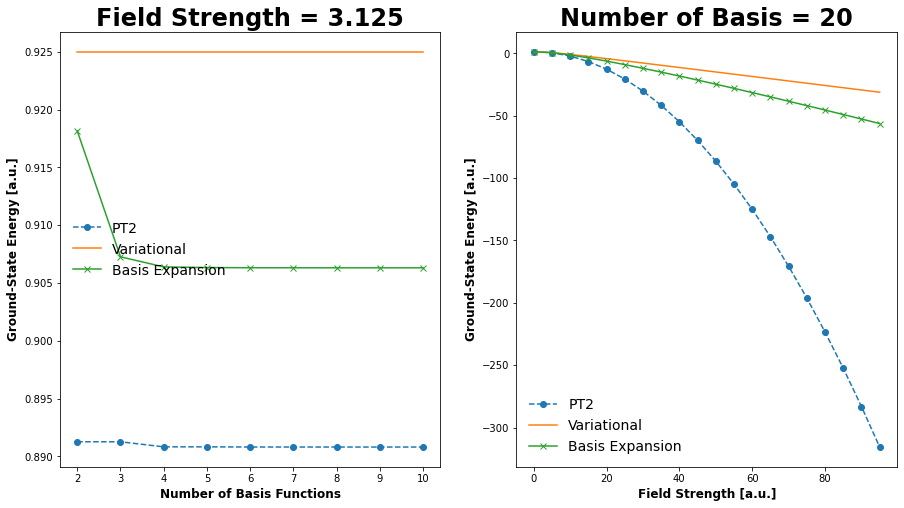

In [4]:
# user-specified parameters
F = 25.0 / 8
nbasis = 20

# plot basis set convergence of energy estimates at a given field
# ---------------------------------------------------------------

# evaluate energy for a range of basis functions at a given field
n_values = np.arange(2, 11, 1)
e_pt2_basis = np.array([energy_pt2(0, F, n) for n in n_values])
e_var_basis = np.repeat(energy_variational(F), len(n_values))
e_exp_basis = np.array([energy_basis(F, n)[0] for n in n_values])

# evaluate energy for a range of fields at a given basis
f_values = np.arange(0.0, 100., 5.)
e_pt2_field = np.array([energy_pt2(0, f, nbasis) for f in f_values])
e_var_field = np.array([energy_variational(f) for f in f_values])
e_exp_field = np.array([energy_basis(f, nbasis)[0] for f in f_values])


plt.rcParams['figure.figsize'] = [15, 8]
fig, axes = plt.subplots(1, 2)
# fig.suptitle("Basis Set Convergence of Particle-in-a-Box with Jacobi Basis", fontsize=24, fontweight='bold')

for index, axis in enumerate(axes.ravel()):
    if index == 0:
        # plot approximate energy at a fixed field
        axis.plot(n_values, e_pt2_basis, marker='o', linestyle='--', label='PT2')
        axis.plot(n_values, e_var_basis, marker='', linestyle='-', label='Variational')
        axis.plot(n_values, e_exp_basis, marker='x', linestyle='-', label='Basis Expansion')
        # set axes labels
        axis.set_xlabel("Number of Basis Functions", fontsize=12, fontweight='bold')
        axis.set_ylabel("Ground-State Energy [a.u.]", fontsize=12, fontweight='bold')
        axis.set_title(f"Field Strength = {F}", fontsize=24, fontweight='bold')
        axis.legend(frameon=False, fontsize=14)
    else:
        # plot approximate energy at a fixed basis
        axis.plot(f_values, e_pt2_field, marker='o', linestyle='--', label='PT2')
        axis.plot(f_values, e_var_field, marker='', linestyle='-', label='Variational')
        axis.plot(f_values, e_exp_field, marker='x', linestyle='-', label='Basis Expansion')
        # set axes labels
        axis.set_xlabel("Field Strength [a.u.]", fontsize=12, fontweight='bold')
        axis.set_ylabel("Ground-State Energy [a.u.]", fontsize=12, fontweight='bold')
        axis.set_title(f"Number of Basis = {nbasis}", fontsize=24, fontweight='bold')
        axis.legend(frameon=False, fontsize=14)

plt.show()

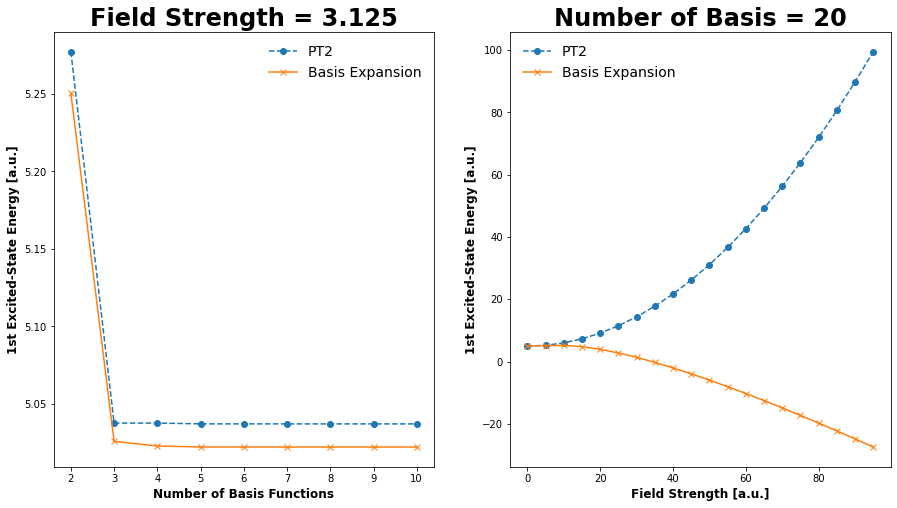

In [5]:
# user-specified parameters
F = 25.0 / 8
nbasis = 20

# plot basis set convergence of 1st excited state energy at a given field
# ---------------------------------------------------------------

# evaluate energy for a range of basis functions at a given field
n_values = np.arange(2, 11, 1)
e_pt2_basis = np.array([energy_pt2(1, F, n) for n in n_values])
e_exp_basis = np.array([energy_basis(F, n)[1] for n in n_values])

# evaluate energy for a range of fields at a given basis
f_values = np.arange(0.0, 100., 5.)
e_pt2_field = np.array([energy_pt2(1, f, nbasis) for f in f_values])
e_exp_field = np.array([energy_basis(f, nbasis)[1] for f in f_values])


plt.rcParams['figure.figsize'] = [15, 8]
fig, axes = plt.subplots(1, 2)
# fig.suptitle("Basis Set Convergence of Particle-in-a-Box with Jacobi Basis", fontsize=24, fontweight='bold')

for index, axis in enumerate(axes.ravel()):
    if index == 0:
        # plot approximate energy at a fixed field
        axis.plot(n_values, e_pt2_basis, marker='o', linestyle='--', label='PT2')
        axis.plot(n_values, e_exp_basis, marker='x', linestyle='-', label='Basis Expansion')
        # set axes labels
        axis.set_xlabel("Number of Basis Functions", fontsize=12, fontweight='bold')
        axis.set_ylabel("1st Excited-State Energy [a.u.]", fontsize=12, fontweight='bold')
        axis.set_title(f"Field Strength = {F}", fontsize=24, fontweight='bold')
        axis.legend(frameon=False, fontsize=14)
    else:
        # plot approximate energy at a fixed basis
        axis.plot(f_values, e_pt2_field, marker='o', linestyle='--', label='PT2')
        axis.plot(f_values, e_exp_field, marker='x', linestyle='-', label='Basis Expansion')
        # set axes labels
        axis.set_xlabel("Field Strength [a.u.]", fontsize=12, fontweight='bold')
        axis.set_ylabel("1st Excited-State Energy [a.u.]", fontsize=12, fontweight='bold')
        axis.set_title(f"Number of Basis = {nbasis}", fontsize=24, fontweight='bold')
        axis.legend(frameon=False, fontsize=14)

plt.show()

## &#x1fa9e; Self-Reflection
- When is a basis set appropriate? When is perturbation theory more appropriate?
- Consider the hydrogen molecule ion, $\text{H}_2^+$. Is it more sensible to use the secular equation (basis-set-expansion) or perturbation theory? What if the bond length is very small? What if the bond length is very large?

## &#x1f914; Thought-Provoking Questions
- Show that if you minimize the energy as a function of the basis-set coefficients using the variational principle, then you obtain the secular equation.
- If a uniform external electric field of magnitude $F$ in the $\hat{\mathbf{u}} = [\hat{u}_x,\hat{u}_y,\hat{u}_z]^T$ direction is applied to a particle with charge $q$, the potential $V(x,y,z) = -qF(u_x x + u_y y + u_z z)$ is added to the Hamiltonian. (This follows from the fact that the force applied to the particles is proportional to the electric field, $\text{force} = q \vec{E} = q F \hat{\mathbf{u}}$ and the force is $\text{force} = - \nabla V(x,y,z)$. If the field is weak, then perturbation theory can be used, and the energy can be written as a Taylor series. The coefficients of the Taylor series give the dipole moment ($\mu$), dipole polarizability ($\alpha$), first dipole hyperpolarizability ($\beta$), second dipole hyperpolarizability ($\gamma$) in the $\hat{\mathbf{u}}$ direction.
   - The dipole moment, $\mu$, of any spherical system is zero. Explain why.
   - The polarizability, $\alpha$, of any system is always positive. Explain why.

$$
\begin{align}
E_k(F) &= E_k(0) + F \left[\frac{dE_k}{d F} \right]_{F=0} 
+ \frac{F^2}{2!} \left[\frac{d^2E_k}{d F^2} \right]_{F=0} 
+ \frac{F^3}{3!} \left[\frac{d^3E_k}{d F^3} \right]_{F=0} 
+ \frac{F^4}{4!} \left[\frac{d^4E_k}{d F^4} \right]_{F=0} + \cdots \\
&= E_k(0) - F \mu_{F=0} 
- \frac{F^2}{2!} \alpha_{F=0} 
- \frac{F^3}{3!} \beta_{F=0} 
- \frac{F^4}{4!} \gamma_{F=0} + \cdots \\
\end{align}
$$

- The Hellmann-Feynman theorem indicates that given the ground-state wavefunction for a molecule, the force on the nuclei can be obtained. Explain how.
- What does it mean that perturbation theory is inaccurate when the perturbation is large?
- Can you explain why the energy goes down when the electron-in-a-box is placed in an external field?
- For a sufficiently-highly excited state, the effect of an external electric field is negligible. Why is this true intuitively? Can you show it graphically? Can you explain it mathematically?

## &#x1f501; Recapitulation
- What is the secular equation?
- What is the Hellmann-Feynman theorem?
- How is the Hellmann-Feynman theorem related to perturbation theory? 
- What is perturbation theory? What is the expression for the first-order perturbed wavefunction?

## &#x1f52e; Next Up...
- Multielectron systems
- Approximate methods for multielectron systems.

## &#x1f4da; References
My favorite sources for this material are:
- [Randy's book](https://github.com/PaulWAyers/IntroQChem/blob/main/documents/DumontBook.pdf?raw=true)
- D. A. MacQuarrie, Quantum Chemistry (University Science Books, Mill Valley California, 1983)

There are also some excellent wikipedia articles:
- [Perturbation theory](https://en.wikipedia.org/wiki/Perturbation_theory)
- [Variational method](https://en.wikipedia.org/wiki/Variational_method_(quantum_mechanics))